# Reinforcement learning

https://huggingface.co/TaTo69/ppo-LunarLander-v3

Навчання з підкріпленням (Reinforcement Learning, або RL), яке намагається керувати посадковим модулем (LunarLander) і посадити його на поверхню. Модель RL навчається приймати рішення, щоб досягти своєї мети (в даному випадку — безпечної посадки), отримуючи винагороди за свої дії.

Using cpu device


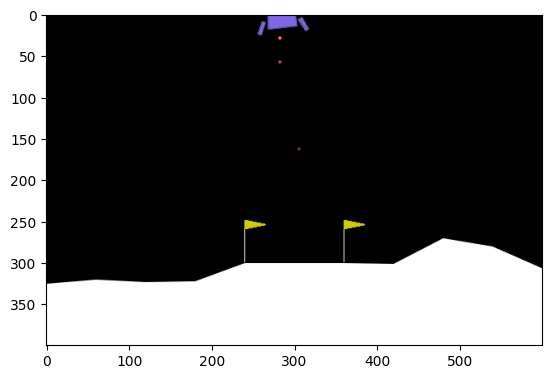

In [4]:
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Створення середовища LunarLander
env = make_vec_env("LunarLander-v3", n_envs=1)

# Завантаження моделі
model = PPO("MlpPolicy", env, verbose=1)

# Ініціалізація кадрів
frames = []
obs = env.reset()

# Запуск симуляції
for _ in range(5000):  # 500 кроків
    action, _ = model.predict(obs)  # Передбачення дій моделлю
    obs, reward, done, info = env.step(action)  # Виконання дій
    frame = env.render(mode='rgb_array')  # Рендеринг кадру
    
    if frame is not None:
        frames.append(frame)  # Зберігаємо кадр
    else:
        print("Frame is None!")

    if done:  # Якщо епізод завершено, скидаємо середовище
        obs = env.reset()

env.close()

# Створення анімації
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
im = ax.imshow(frames[0])

def update(frame):
    im.set_data(frame)
    return [im]

ani = FuncAnimation(fig, update, frames=frames, blit=True)
ani.save("hometask-17-Reinforcement-learning-lunar-lander-animation.mp4", fps=30, dpi=300)  # Зберігаємо відео
plt.show()


# Відео

In [8]:
from IPython.display import HTML

video_path = "hometask-17-Reinforcement-learning-lunar-lander-animation.mp4"

# Відображення відео
HTML(f"""
<video width="640" height="480" controls>
  <source src="{video_path}" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")


Здебільшого нормальне приземлення але інколи розбиваєтся